Histogram plots and Mann-withney normalized tests are computed for:
1. Center frequency of each peak for each channel in both epileptic and non-epileptic groups
2. Offset and exponent of each aperiodic component of each channel
3. Measurities of centrality of different networks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
import math
import seaborn as sns

In [3]:
sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rcParams['lines.linewidth'] = 0.5
plt.rc('font', size=13)          # controls default text sizes

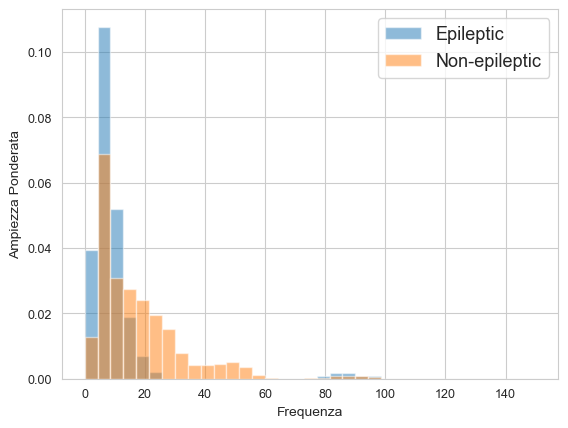

In [8]:
# Carico i file CSV
df1 = pd.read_csv('9_epi')
df2 = pd.read_csv('9_non_epi')

# Estrae i dati della prima colonna
frequenze1 = df1.iloc[:, 0].values
frequenze2 = df2.iloc[:, 0].values

ampiezze1 =df1.iloc[:, 1].values
ampiezze2 = df2.iloc[:, 1].values

# print('frequenza1', frequenze1, 'ampiezza1', ampiezze1)
# print('frequenza2', frequenze1, 'ampiezza2', ampiezze1)
# Creazione degli istogrammi ponderati
plt.hist(frequenze1, bins=35, range=(0,150), weights=ampiezze1, density=True, alpha=0.5, label='Epileptic')
plt.hist(frequenze2, bins=35, range=(0,150), weights=ampiezze2, density=True, alpha=0.5, label='Non-epileptic')

# Aggiunta delle etichette e della legenda
plt.xlabel('Frequenza')
plt.ylabel('Ampiezza Ponderata')
plt.legend()

# Mostra il grafico
plt.show()


delta range 94
bin 9
Range delta:
Mann-Whitney normalized U test: 0.3800925925925926



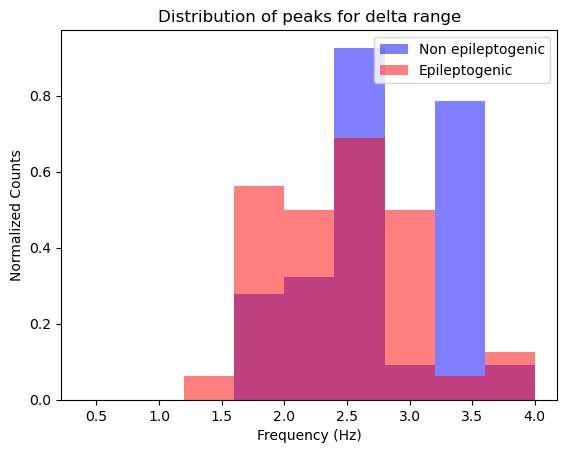

delta 2 range 202
bin 14
Range delta 2:
Mann-Whitney normalized U test: 0.3875718390804598



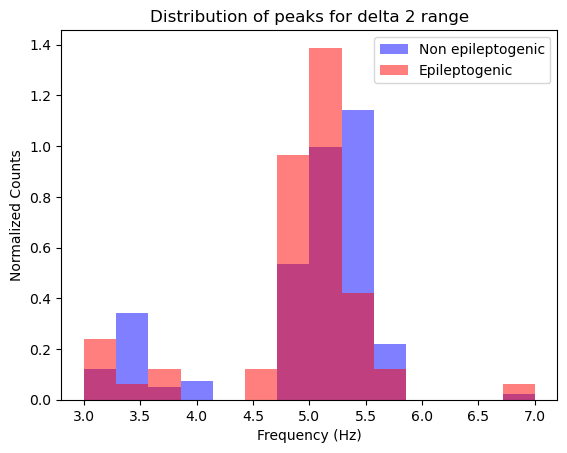

teta range 336
bin 18
Range teta:
Mann-Whitney normalized U test: 0.4963559322033898



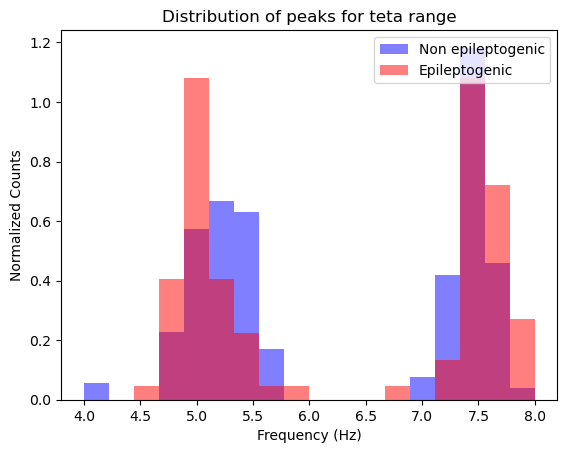

alpha range 189
bin 13
Range alpha:
Mann-Whitney normalized U test: 0.4658375786634702



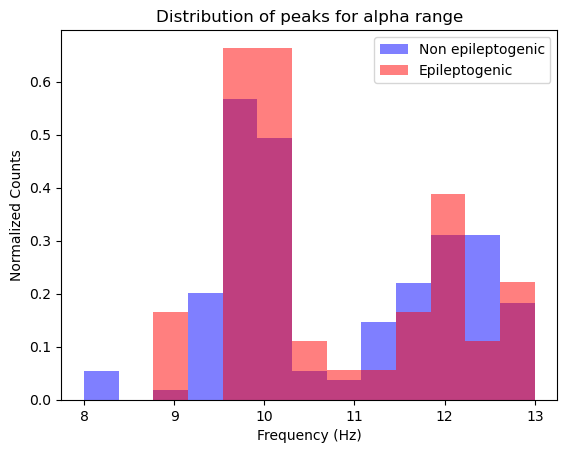

beta range 428
bin 20
Range beta:
Mann-Whitney normalized U test: 0.2569796954314721



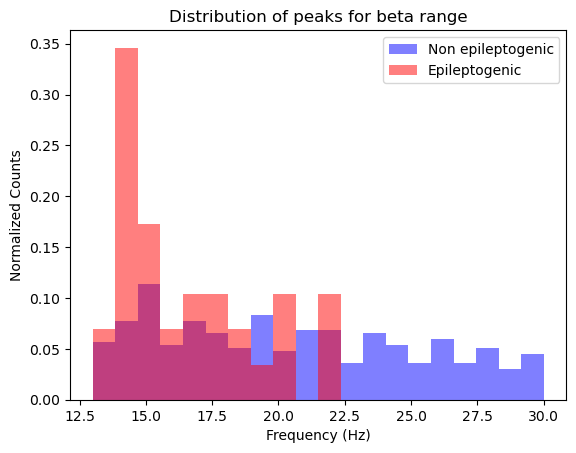

beta 1 range 309
bin 17
Range beta 1:
Mann-Whitney normalized U test: 0.3865313653136531



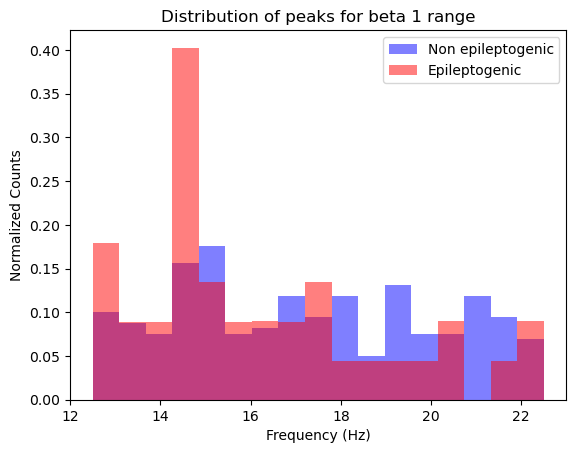

gamma1 range 136
bin 11


C:\Users\Ele_p\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


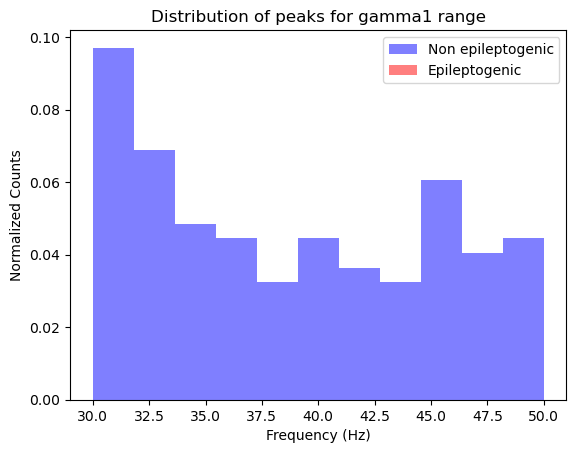

gamma2 range 38
bin 6


C:\Users\Ele_p\anaconda3\lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


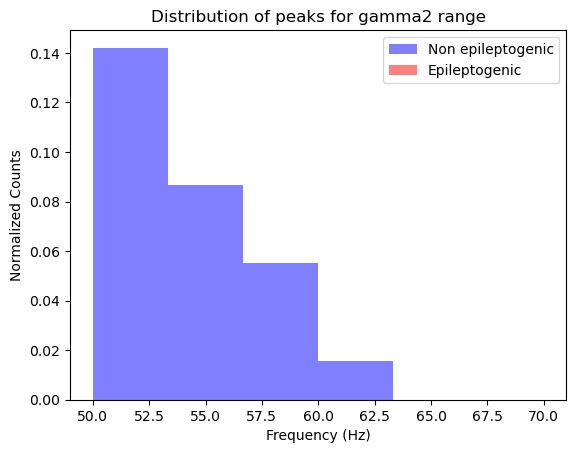

gamma3 range 16
bin 4
Range gamma3:
Mann-Whitney normalized U test: 0.6181818181818182



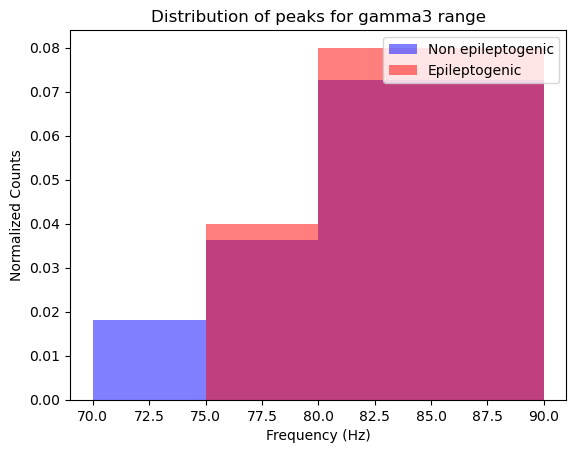

gamma4 range 9
bin 3
Range gamma4:
Mann-Whitney normalized U test: 0.42857142857142855



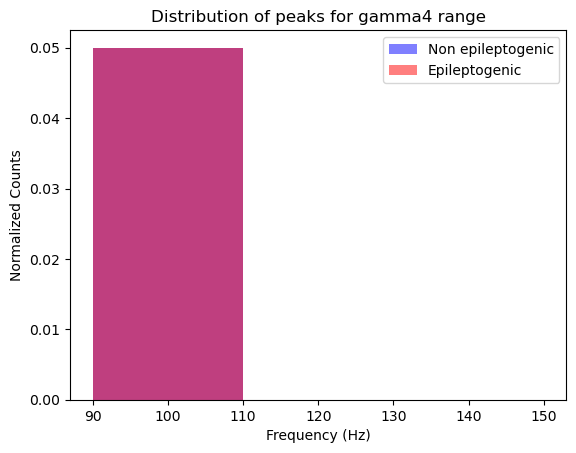

gamma range 199
bin 14
Range gamma:
Mann-Whitney normalized U test: 0.9523809523809523



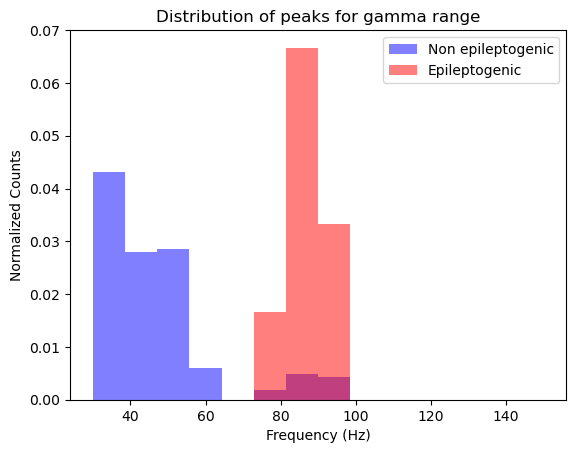

In [15]:
# Estrai i dati della prima colonna
data1 = df1.iloc[:, 0].values
data2 = df2.iloc[:, 0].values

# Definisci i range
ranges = {
    'delta': (0.4, 4),
    'delta 2': (3,7),
    'teta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'beta 1': (12.5, 22.5),
    'gamma1': (30, 50),
    'gamma2': (50, 70),
    'gamma3': (70, 90),
    'gamma4': (90, 150),
    'gamma':(30,150)
}

# Visualizza gli istogrammi per ogni range
for label, (start, end) in ranges.items():
    data1_range = data1[(data1 >= start) & (data1 < end)]
    data2_range = data2[(data2 >= start) & (data2 < end)]
    print(f'{label} range', len(data1_range)+len(data2_range))
    bins=int(math.sqrt(len(data1_range)+len(data2_range)))
    print('bin', bins)
    plt.hist(data2, bins=bins, range=(start, end), density=True, alpha=0.5, label=f'Non epileptogenic', color='blue')
    plt.hist(data1, bins=bins, range=(start, end), density=True, alpha=0.5, label=f'Epileptogenic', color='red')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Normalized Counts')
    plt.title(f'Distribution of peaks for {label} range')
    plt.legend(loc='upper right')
    if len(data1_range) > 0 and len(data2_range) > 0:
        u_statistic, p_value = mannwhitneyu(data1_range, data2_range)
        u_statistic_normalized = u_statistic / (len(data1_range) * len(data2_range))
        
        mean1, mean2 = np.mean(data1_range), np.mean(data2_range)
        std1, std2 = np.std(data1_range), np.std(data2_range)
        cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
        
        print(f"Range {label}:")
        print("Mann-Whitney normalized U test:", u_statistic_normalized)
        #print("P-value:", p_value)
        #print("Cohen's d:", cohen_d)
        print()

    # Aggiungi testo sotto il grafico
    #plt.figtext(0.5, -0.1, f'Mann-Whitney normalized U test: {u_statistic_normalized:.2f}', ha='right', fontsize=10)
    #plt.figtext(0.5, -0.15, f'P-value: {p_value:.2e}', ha='right', fontsize=10)
    # Salva il grafico prima di mostrarlo
    plt.savefig(f'Distribution_of_peaks_for_{label}.jpg', format="jpg", bbox_inches='tight')
    plt.show()

# # Esegui il test di Mann-Whitney U e calcola Cohen's d per ogni range
# for label, (start, end) in ranges.items():
#     data1_range = data1[(data1 >= start) & (data1 < end)]
#     data2_range = data2[(data2 >= start) & (data2 < end)]
#     print(f'{label} range', len(data1_range)+len(data2_range))
    

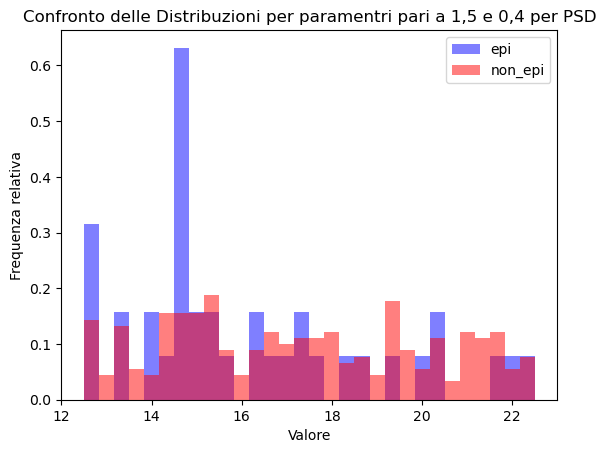

Statistica U normalizzata: 0.25792963499121085
P-value: 2.630465794079447e-30
Cohen's d: -0.605853671624183


In [20]:
bins=int(math.sqrt(len(data1)+len(data2)))

# Calcolo degli istogrammi con frequenze relative
counts1, bin_edges1 = np.histogram(data2, bins=bins, range=(12.5, 22.5), density=True)
counts2, bin_edges2 = np.histogram(data1, bins=bins, range=(12.5, 22.5), density=True)

# Visualizzazione degli istogrammi sovrapposti
plt.hist(data2, bins=bins, range=(12.5, 22.5), density=True, alpha=0.5, label='Non epileptogenic', color='blue')
plt.hist(data1, bins=bins, range=(12.5, 22.5), density=True, alpha=0.5, label='Epileptogenic', color='red')
plt.xlabel('Valore')
plt.ylabel('Frequenza relativa')
plt.title('Confronto delle Distribuzioni per paramentri pari a 1,5 e 0,4 per PSD')
plt.legend(loc='upper right')

plt.show()

# Esegui il test di Mann-Whitney U
u_statistic, p_value = mannwhitneyu(data1, data2)

# Normalizza la statistica U dividendo per la lunghezza dei dati
u_statistic_normalized = u_statistic / (len(data1) * len(data2))

print("Mann-Whitney normalized U test:", u_statistic_normalized)
print("P-value:", p_value)


# Calcolo delle medie e delle deviazioni standard
mean1, mean2 = np.mean(data1), np.mean(data2)
std1, std2 = np.std(data1), np.std(data2)

# # Calcolo di Cohen's d
# cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

# print("Cohen's d:", cohen_d)

228
1018
31
Mann-Whitney normalized U test: 0.25792963499121085


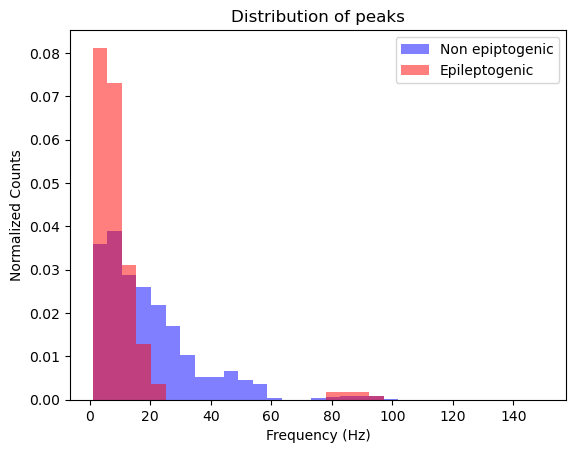

In [14]:
bins = int(math.sqrt(len(data2)))
# Calcolo degli istogrammi con frequenze relative
counts1, bin_edges1 = np.histogram(data2, bins=bins, range=(1, 150), density=True)
counts2, bin_edges2 = np.histogram(data1, bins=bins, range=(1, 150), density=True)

# Visualizzazione degli istogrammi sovrapposti

plt.hist(data2, bins=bins, range=(1, 150), density=True, alpha=0.5, label='Non epiptogenic', color='blue')
plt.hist(data1, bins=bins, range=(1, 150), density=True, alpha=0.5, label='Epileptogenic', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Counts')
plt.title('Distribution of peaks')
plt.legend(loc='upper right')



# Esegui il test di Mann-Whitney U
u_statistic, p_value = mannwhitneyu(data1, data2)

# Normalizza la statistica U dividendo per la lunghezza dei dati
u_statistic_normalized = u_statistic / (len(data1) * len(data2))

print("Mann-Whitney normalized U test:", u_statistic_normalized)
#print("P-value:", p_value)


# Calcolo delle medie e delle deviazioni standard
mean1, mean2 = np.mean(data1), np.mean(data2)
std1, std2 = np.std(data1), np.std(data2)

# Aggiungi testo sotto il grafico
#plt.figtext(0.5, -0.1, f'Mann-Whitney normalized U test: {u_statistic_normalized:.2f}', ha='right', fontsize=10)
#plt.figtext(0.5, -0.15, f'P-value: {p_value:.2e}', ha='right', fontsize=10)
# Salva il grafico prima di mostrarlo
plt.savefig("Distribution_of_peaks.jpg", format="jpg", bbox_inches='tight')
plt.show()

# # Calcolo di Cohen's d
# cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

# print("Cohen's d:", cohen_d)

170
bin 13
Statistica U normalizzata: 0.6005931784478498
P-value: 0.03805488612032852


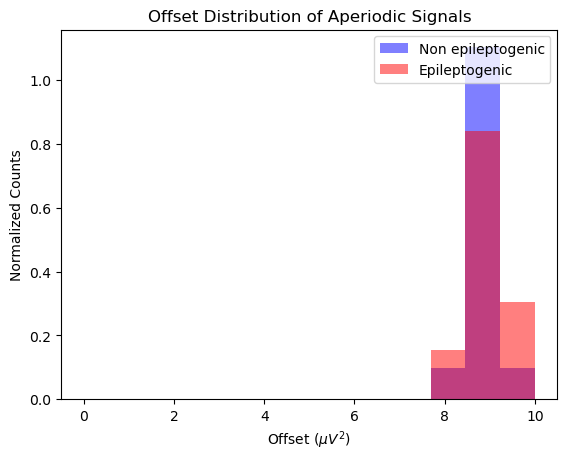

In [12]:
# Carica i file CSV
df1 = pd.read_csv('aps_epi')
df2 = pd.read_csv('aps_non_epi')

# Estrai i dati della prima colonna
data1 = df1.iloc[:, 0].values
data2 = df2.iloc[:, 0].values
print(len(data1)+len(data2))
bins=int(math.sqrt(len(data1)+len(data2)))
print('bin', bins)
# Calcolo degli istogrammi con frequenze relative
counts1, bin_edges1 = np.histogram(data1, bins=bins, range=(0, 10), density=True)
counts2, bin_edges2 = np.histogram(data2, bins=bins, range=(0, 10), density=True)

# Visualizzazione degli istogrammi sovrapposti
plt.hist(data2, bins=bins, range=(0, 10), density=True, alpha=0.5, label='Non epileptogenic', color='blue')
plt.hist(data1, bins=bins, range=(0, 10), density=True, alpha=0.5, label='Epileptogenic', color='red')
plt.xlabel('Offset ($\mu V^2$)')
plt.ylabel('Normalized Counts')
plt.title('Offset Distribution of Aperiodic Signals')
plt.legend(loc='upper right')



# Esegui il test di Mann-Whitney U
u_statistic, p_value = mannwhitneyu(data1, data2)

# Normalizza la statistica U dividendo per la lunghezza dei dati
u_statistic_normalized = u_statistic / (len(data1) * len(data2))

print("Statistica U normalizzata:", u_statistic_normalized)
print("P-value:", p_value)


# # Calcolo delle medie e delle deviazioni standard
# mean1, mean2 = np.mean(data1), np.mean(data2)
# std1, std2 = np.std(data1), np.std(data2)

# # Calcolo di Cohen's d
# cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

# print("Cohen's d:", cohen_d)
# Aggiungi testo sotto il grafico
#plt.figtext(0.5, -0.1, f'Mann-Whitney normalized U test: {u_statistic_normalized:.2f}', ha='right', fontsize=10)
#plt.figtext(0.5, -0.15, f'P-value: {p_value:.2e}', ha='right', fontsize=10)

# Salva il grafico prima di mostrarlo
plt.savefig(f'Offset distribution.jpg', format="jpg", bbox_inches='tight')

plt.show()

170
bin 13
Statistica U normalizzata: 0.44027022573735375
P-value: 0.21833927869343328


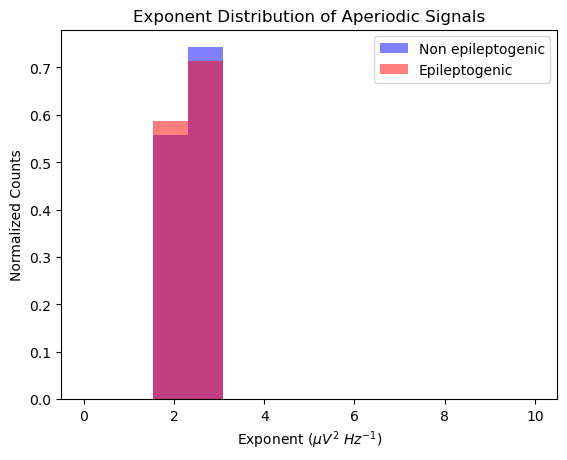

In [13]:
# Carica i file CSV
df1 = pd.read_csv('aps_epi')
df2 = pd.read_csv('aps_non_epi')

# Estrai i dati della prima colonna
data1 = df1.iloc[:, 1].values
data2 = df2.iloc[:, 1].values
print(len(data1)+len(data2))
bins=int(math.sqrt(len(data1)+len(data2)))
print('bin', bins)
# Calcolo degli istogrammi con frequenze relative
counts1, bin_edges1 = np.histogram(data1, bins=bins, range=(0, 10), density=True)
counts2, bin_edges2 = np.histogram(data2, bins=bins, range=(0, 10), density=True)

# Visualizzazione degli istogrammi sovrapposti
plt.hist(data2, bins=bins, range=(0, 10), density=True, alpha=0.5, label='Non epileptogenic', color='blue')
plt.hist(data1, bins=bins, range=(0, 10), density=True, alpha=0.5, label='Epileptogenic', color='red')
plt.xlabel('Exponent ($\mu V^2 \ Hz^{-1}$)')
plt.ylabel('Normalized Counts')
plt.title('Exponent Distribution of Aperiodic Signals')
plt.legend(loc='upper right')



# Esegui il test di Mann-Whitney U
u_statistic, p_value = mannwhitneyu(data1, data2)

# Normalizza la statistica U dividendo per la lunghezza dei dati
u_statistic_normalized = u_statistic / (len(data1) * len(data2))

print("Statistica U normalizzata:", u_statistic_normalized)
print("P-value:", p_value)


# # Calcolo delle medie e delle deviazioni standard
# mean1, mean2 = np.mean(data1), np.mean(data2)
# std1, std2 = np.std(data1), np.std(data2)

# # Calcolo di Cohen's d
# cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

# print("Cohen's d:", cohen_d)
# Aggiungi testo sotto il grafico
#plt.figtext(0.5, -0.1, f'Mann-Whitney normalized U test: {u_statistic_normalized:.2f}', ha='right', fontsize=10)
#plt.figtext(0.5, -0.15, f'P-value: {p_value:.2e}', ha='right', fontsize=10)

# Salva il grafico prima di mostrarlo
plt.savefig(f'Exponent distribution.jpg', format="jpg", bbox_inches='tight')

plt.show()

In [38]:
# Iterare attraverso ogni network
for i in range(14):
    # Carica i file CSV
    df1 = pd.read_csv(f'centrality_measures_epi{i}.csv')
    df2 = pd.read_csv(f'centrality_measures_non_epi{i}.csv')

    for col in range(1, 5):
        # Estrai i dati della colonna specificata
        data1 = df1.iloc[:, col].values
        data2 = df2.iloc[:, col].values
        print(len(data1))
        print(len(data2))
        max_data = float(max(max(data1), max(data2)))
        bins = int(math.sqrt(len(data2)))
        print(bins)
        
        # Calcolo degli istogrammi con frequenze relative
        counts1, bin_edges1 = np.histogram(data1, bins=10, range=(0, max_data), density=True)
        counts2, bin_edges2 = np.histogram(data2, bins=10, range=(0, max_data), density=True)

        # Esegui il test di Mann-Whitney U
        u_statistic, p_value = mannwhitneyu(data1, data2)

        # Normalizza la statistica U dividendo per la lunghezza dei dati
        u_statistic_normalized = u_statistic / (len(data1) * len(data2))

        print(f"Network {i}, Colonna {col}:")
        print("Statistica U normalizzata:", u_statistic_normalized)
        print("P-value:", p_value)

        # Calcolo delle medie e delle deviazioni standard
        mean1, mean2 = np.mean(data1), np.mean(data2)
        std1, std2 = np.std(data1), np.std(data2)

        # Calcolo di Cohen's d
        cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)

        print("Cohen's d:", cohen_d)
        print("\n")
        
        if u_statistic_normalized <= 0.3 or u_statistic_normalized >= 0.70 :
             # Salva le statistiche in un file CSV
            stats_output_path = f'statistics_network_integrale_{i}_col_{col}.csv'
            with open(stats_output_path, 'w') as f:
                f.write(f"Network {i}, Colonna {col}:\n")
                f.write(f"Statistica U normalizzata: {u_statistic_normalized}\n")
                f.write(f"P-value: {p_value}\n")
                f.write(f"Cohen's d: {cohen_d}\n")
                f.write(f"Mean1: {mean1}, Std1: {std1}\n")
                f.write(f"Mean2: {mean2}, Std2: {std2}\n")

            # Visualizzazione degli istogrammi sovrapposti
            plt.hist(data1, bins=10, range=(0, max_data), density=True, alpha=0.5, label='epi', color='blue')
            plt.hist(data2, bins=10, range=(0, max_data), density=True, alpha=0.5, label='non_epi', color='red')
            plt.xlabel('Valore')
            plt.ylabel('Frequenza relativa')
            plt.title(f'Confronto delle Distribuzioni per paramentri pari a 1,5 e 0,4 per PSD - Network {i}, Colonna {col}')
            plt.legend(loc='upper right')

            # Salva l'istogramma
            histogram_output_path = f'histogram_network_integrale_{i}_col_{col}.png'
            plt.savefig(histogram_output_path)
            plt.close()

print("Le statistiche e gli istogrammi sono stati salvati nei rispettivi file CSV e PNG.")


49
119
10
Network 0, Colonna 1:
Statistica U normalizzata: 0.43826101869319156
P-value: 0.209327583367934
Cohen's d: -0.39120477643895224


49
119
10
Network 0, Colonna 2:
Statistica U normalizzata: 0.30800891785285545
P-value: 9.415446956190041e-05
Cohen's d: -0.5748290578530987


49
119
10
Network 0, Colonna 3:
Statistica U normalizzata: 0.43826101869319156
P-value: 0.209327583367934
Cohen's d: -0.3509514615565555


49
119
10
Network 0, Colonna 4:
Statistica U normalizzata: 0.47144572114560107
P-value: 0.5623725834141255
Cohen's d: -0.34767785521473943


49
119
10
Network 1, Colonna 1:
Statistica U normalizzata: 0.43826101869319156
P-value: 0.209327583367934
Cohen's d: -0.39120477643895224


49
119
10
Network 1, Colonna 2:
Statistica U normalizzata: 0.30800891785285545
P-value: 9.415446956190041e-05
Cohen's d: -0.5748290578530987


49
119
10
Network 1, Colonna 3:
Statistica U normalizzata: 0.43826101869319156
P-value: 0.209327583367934
Cohen's d: -0.3509514615565555


49
119
10
Netwo

C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)


49
119
10
Network 5, Colonna 2:
Statistica U normalizzata: 0.5
P-value: 1.0
Cohen's d: nan


49
119
10
Network 5, Colonna 3:
Statistica U normalizzata: 0.3433373349339736
P-value: 0.0002155006314724592
Cohen's d: -0.6815736633714798


49
119
10
Network 5, Colonna 4:
Statistica U normalizzata: 0.3433373349339736
P-value: 0.0002155006314724592
Cohen's d: -0.6815736633714792


49
119
10
Network 6, Colonna 1:
Statistica U normalizzata: 0.42436974789915966
P-value: 0.004113403057734154
Cohen's d: -0.5970223141259933


49
119
10
Network 6, Colonna 2:
Statistica U normalizzata: 0.5
P-value: 1.0
Cohen's d: nan


49
119
10
Network 6, Colonna 3:
Statistica U normalizzata: 0.42436974789915966
P-value: 0.004113403057734154
Cohen's d: -0.5970223141259933




C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)


49
119
10
Network 6, Colonna 4:
Statistica U normalizzata: 0.42436974789915966
P-value: 0.004113403057734154
Cohen's d: -0.5970223141259933


49
119
10
Network 7, Colonna 1:
Statistica U normalizzata: 0.49339735894357745
P-value: 0.6523299820873758
Cohen's d: -0.08152398792008089


49
119
10
Network 7, Colonna 2:
Statistica U normalizzata: 0.5
P-value: 1.0
Cohen's d: nan


49
119
10
Network 7, Colonna 3:
Statistica U normalizzata: 0.49339735894357745
P-value: 0.6523299820873758
Cohen's d: -0.08152398792008089


49
119
10
Network 7, Colonna 4:
Statistica U normalizzata: 0.49339735894357745
P-value: 0.6523299820873758
Cohen's d: -0.08152398792008095


49
119
10
Network 8, Colonna 1:
Statistica U normalizzata: 0.35294117647058826
P-value: 0.0005535325991681819
Cohen's d: -0.6216392291597145




C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)
C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)


49
119
10
Network 8, Colonna 2:
Statistica U normalizzata: 0.5
P-value: 1.0
Cohen's d: nan


49
119
10
Network 8, Colonna 3:
Statistica U normalizzata: 0.35294117647058826
P-value: 0.0005535325991681819
Cohen's d: -0.6216392291597146


49
119
10
Network 8, Colonna 4:
Statistica U normalizzata: 0.35294117647058826
P-value: 0.0005535325991681819
Cohen's d: -0.621639229159714


49
119
10
Network 9, Colonna 1:
Statistica U normalizzata: 0.5002572457554451
P-value: 0.9972152506530335
Cohen's d: -0.17550086670521634


49
119
10
Network 9, Colonna 2:
Statistica U normalizzata: 0.4392900017149717
P-value: 0.21736143670698682
Cohen's d: -0.23947840513595395


49
119
10
Network 9, Colonna 3:
Statistica U normalizzata: 0.5006859886811867
P-value: 0.9902535813877412
Cohen's d: -0.10710062101631597


49
119
10
Network 9, Colonna 4:
Statistica U normalizzata: 0.5155204939118505
P-value: 0.7534723750850786
Cohen's d: -0.16309833594741868


49
119
10
Network 10, Colonna 1:
Statistica U normalizzata: 0

C:\Users\Ele_p\AppData\Local\Temp\ipykernel_22700\1992182221.py:43: RuntimeWarning: invalid value encountered in scalar divide
  cohen_d = (mean1 - mean2) / np.sqrt((std1**2 + std2**2) / 2)


49
119
10
Network 13, Colonna 4:
Statistica U normalizzata: 0.6587206311095867
P-value: 1.771348238822331e-05
Cohen's d: 0.9245318219036117


Le statistiche e gli istogrammi sono stati salvati nei rispettivi file CSV e PNG.


In [7]:
# Lista dei nomi delle misure di centralità
centrality_measures = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Clustering Centrality']

# Lista dei nomi dei network
network_names = [f'Network {i}' for i in range(14)]

# Crea un DataFrame vuoto con le misure di centralità come indice e i nomi dei network come colonne
results_df = pd.DataFrame(index=centrality_measures, columns=network_names)

for i in range(14):
    # Carica i file CSV
    df1 = pd.read_csv(f'centrality_measures_epi_{i}.csv')
    df2 = pd.read_csv(f'centrality_measures_non_epi_{i}.csv')

    for col in range(1, 5):
        # Estrai i dati della colonna specificata
        data1 = df1.iloc[:, col].values
        data2 = df2.iloc[:, col].values
        
        max_data = float(max(max(data1), max(data2)))
        bins = int(math.sqrt(len(data2)))
        
        # Calcolo degli istogrammi con frequenze relative
        counts1, bin_edges1 = np.histogram(data1, bins=10, range=(0, max_data), density=True)
        counts2, bin_edges2 = np.histogram(data2, bins=10, range=(0, max_data), density=True)

        # Esegui il test di Mann-Whitney U
        u_statistic, p_value = mannwhitneyu(data1, data2)

        # Normalizza la statistica U dividendo per la lunghezza dei dati
        u_statistic_normalized = u_statistic / (len(data1) * len(data2))

        # Aggiungi i risultati alla tabella solo se U rispetta la condizione
        if u_statistic_normalized <= 0.35 or u_statistic_normalized >= 0.65:
            results_df.at[centrality_measures[col-1], f'Network {i}'] = f'U: {u_statistic_normalized:.3f}'

# Stampa la tabella
print(results_df)

# Salva la tabella in un file CSV
#results_df.to_csv('centrality_measures_comparison.csv')


                       Network 0 Network 1 Network 2 Network 3 Network 4  \
Degree Centrality            NaN       NaN       NaN  U: 0.654       NaN   
Betweenness Centrality       NaN       NaN       NaN       NaN       NaN   
Closeness Centrality         NaN       NaN       NaN  U: 0.654       NaN   
Clustering Centrality        NaN       NaN       NaN  U: 0.654       NaN   

                       Network 5 Network 6 Network 7 Network 8 Network 9  \
Degree Centrality       U: 0.324       NaN       NaN  U: 0.322       NaN   
Betweenness Centrality       NaN       NaN       NaN       NaN       NaN   
Closeness Centrality    U: 0.324       NaN       NaN  U: 0.322       NaN   
Clustering Centrality   U: 0.324       NaN       NaN  U: 0.322       NaN   

                       Network 10 Network 11 Network 12 Network 13  
Degree Centrality             NaN   U: 0.284        NaN   U: 0.704  
Betweenness Centrality        NaN   U: 0.299        NaN        NaN  
Closeness Centrality          N